In [1]:
import matplotlib.pyplot as plt
import xarray as xr 
import metpy.calc as mpcalc
from metpy.units import units
from glob import glob
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [47]:
def projection(lon, lat):
    #m = Basemap(projection='ortho',lon_0=-30,lat_0=50, resolution='l')
    #m = Basemap(projection='nsper',lon_0=-25,lat_0=50, resolution='l',satellite_height=4e6)
    #m = Basemap(projection='kav7',lon_0=0, resolution='c')
    m = Basemap(projection='moll',lon_0=0, resolution='c')
    m.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
    #m.drawcountries(linewidth=0.5, linestyle='solid', color='black')
    x, y = m(lon,lat)
    return(m, x, y)

In [2]:
%%time
folder = '/scratch/local1/m300382/icon_globe/'

file = glob(folder+'ICON_*_3h.nc')

dset = xr.open_dataset(file[0])
#dset = dset.metpy.parse_cf()
#dset_850hpa = dset.metpy.sel(plev=850 * units.hPa)

# theta_e = mpcalc.equivalent_potential_temperature(850 * units.hPa, dset_850hpa['t'],
# 				 mpcalc.dewpoint_rh(dset_850hpa['t'], dset_850hpa['r']/100.)).to(units.degC)

# mslp = dset_850hpa.prmsl[:,:]/100.

#lon = (dset['clon'].values*units.radian).to(units.degreeN)
#lat = (dset['clat'].values*units.radian).to(units.degreeE)

lon = np.rad2deg(dset['clon'].values)
lat = np.rad2deg(dset['clat'].values)

CPU times: user 108 ms, sys: 48 ms, total: 156 ms
Wall time: 168 ms


In [6]:
%%time
mask = np.logical_or(x<1.e20,y<1.e20)
x = np.compress(mask,x)
y = np.compress(mask,y)

CPU times: user 124 ms, sys: 20 ms, total: 144 ms
Wall time: 144 ms


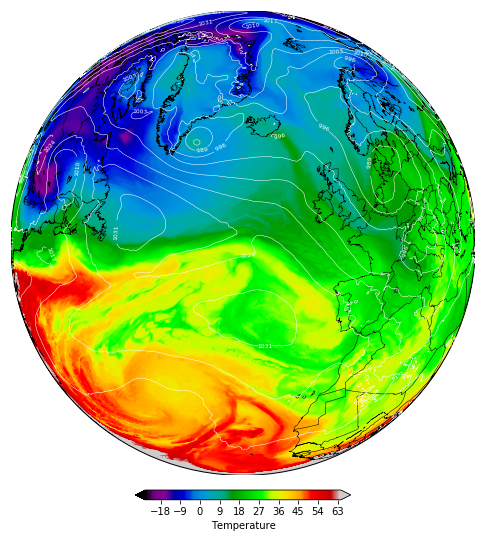

CPU times: user 46.3 s, sys: 264 ms, total: 46.5 s
Wall time: 35.3 s


In [330]:
%%time
fig = plt.figure(figsize=(16,9))
m, x, y =projection(lon, lat)
# m.shadedrelief(scale=0.4, alpha=0.8)
levels = np.arange(-25., 65., .5)

# Create a mask to retain only the points inside the globe
# to avoid a bug in basemap and a problem in matplotlib
# GODDAMNIT FIXIT 
mask = np.logical_or(x<1.e20,y<1.e20)
x = np.compress(mask,x)
y = np.compress(mask,y)
#

cs = m.contourf(x, y, theta_e[0, mask], extend='both', cmap='nipy_spectral', tri=True, levels=levels)
c = plt.tricontour(x, y, mslp[0, mask], levels=np.arange(mslp.min(), mslp.max(), 7.), colors='white', linewidths=0.5)

plt.colorbar(cs, orientation='horizontal', label='Temperature', pad=0.03, fraction=0.02)
labels = plt.gca().clabel(c, c.levels, inline=True, fmt='%4.0f' , fontsize=6)
plt.savefig('test.png', dpi=150, transparent=True, bbox_inches='tight')
plt.show()

CPU times: user 24.9 s, sys: 12 ms, total: 25 s
Wall time: 25 s


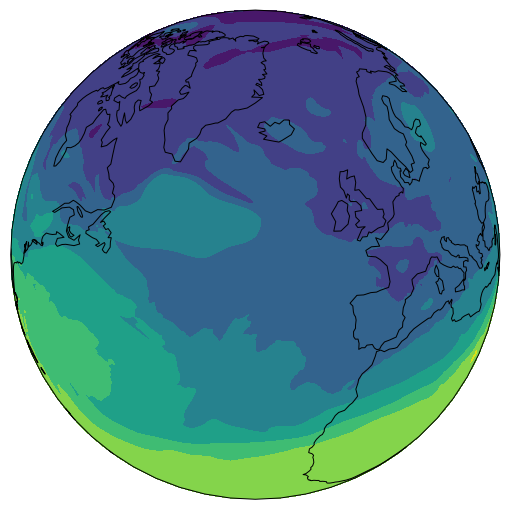

In [40]:
%%time
fig = plt.figure(figsize=(16,9))
proj = ccrs.NearsidePerspective(
                            central_latitude=50.,
                            central_longitude=-25.,
                            satellite_height=4e6)
x, y, _ = proj.transform_points(ccrs.PlateCarree(), lon, lat).T

mask = np.invert(np.logical_or(np.isinf(x), np.isinf(y)))
x = np.compress(mask, x)
y = np.compress(mask, y)

ax = plt.axes(projection=proj)

ax.tricontourf(x, y, dset.t[0,0, mask] )

ax.coastlines()

CPU times: user 28.9 s, sys: 1.02 s, total: 29.9 s
Wall time: 29.9 s


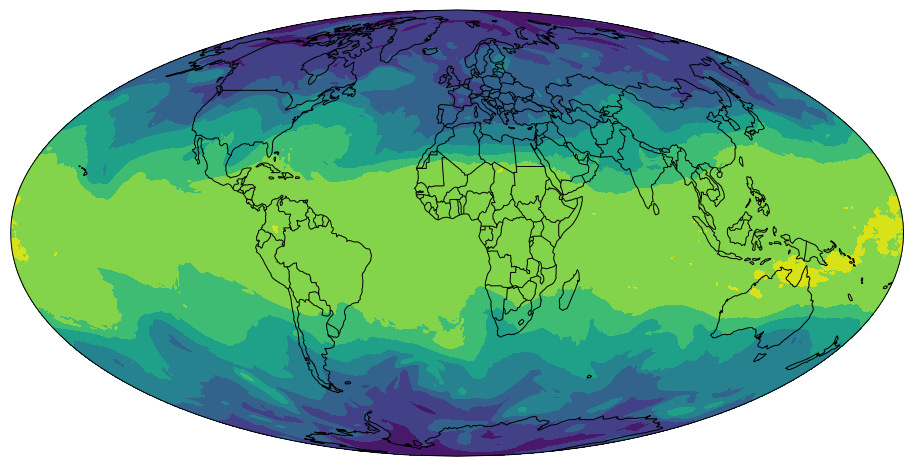

In [54]:
%%time
fig = plt.figure(figsize=(16,9))

proj = ccrs.Mollweide()

x, y, _ = proj.transform_points(ccrs.PlateCarree(), lon, lat).T

mask = np.invert(np.logical_or(np.isinf(x), np.isinf(y)))
x = np.compress(mask, x)
y = np.compress(mask, y)

# mask = np.invert(np.logical_or(np.isinf(x), np.isinf(y)))
# x = np.compress(mask, x)
# y = np.compress(mask, y)

ax = plt.axes(projection=proj)

ax.tricontourf(x, y, dset.t[0,0, mask])

ax.add_feature(cfeature.BORDERS)
ax.coastlines()

CPU times: user 30.5 s, sys: 1.09 s, total: 31.6 s
Wall time: 31.5 s


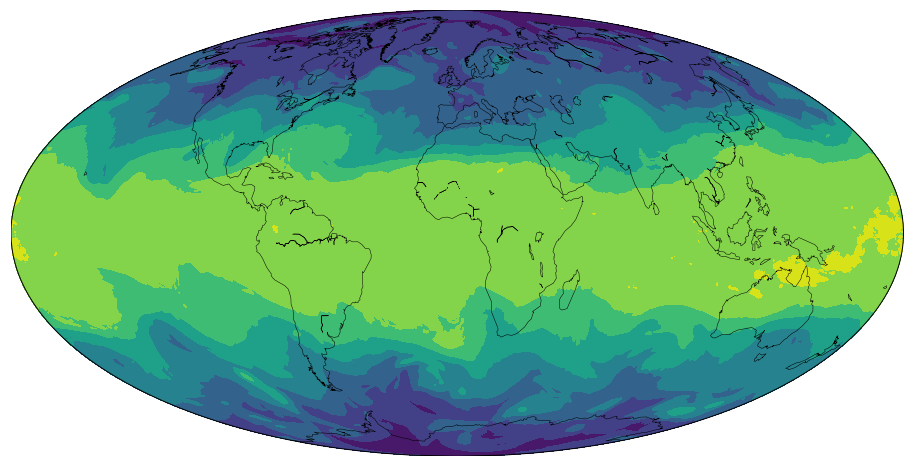

In [48]:
%%time
fig = plt.figure(figsize=(16,9))
m, x, y = projection(lon, lat)

plt.tricontourf(x, y, dset.t[0,0])